Deep and Wide NN for MNIST<br>
add TensorBoard

In [1]:
# Deep NN for MNIST
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])
#print(X, Y)

W1 = []
b1 = []
x1 = []
y1 = []
with tf.name_scope("layer1") as scope:
    for i in range(28):
        j = (i)*28
        k = (i+1)*28
        x1.append(X[:,j:k])
        #print("[%2d] %d:%d %d" % (i, j, k, k - j))
        W1.append( tf.Variable(tf.random_normal([28, 32]), name='weightA%d' % (i)) )
        b1.append( tf.Variable(tf.random_normal([32]), name='biasA%d' % (i)) )
        y1.append( tf.nn.softmax(tf.matmul(x1[i], W1[i]) + b1[i]) )
        #print("[%2d]" % i, x1[i].get_shape().dims[-1],
        #      "X:", x1[i].shape, "W:", W1[i].shape, "b:", b1[i].shape, "y:", y1[i].shape)

    print("X:", X.shape, "x1:", x1[0].shape, len(x1), "W1:", W1[0].shape, len(W1),
          "b1:", b1[0].shape, len(b1), "y1:", y1[0].shape, len(y1))

W2 = []
b2 = tf.Variable(tf.random_normal([nb_classes]))
y2 = b2
with tf.name_scope("layer2") as scope:
    for i in range(28):
        W2.append( tf.Variable(tf.random_normal([32, nb_classes]), name='weightB%d' % (i)) )
        y2 += tf.matmul(y1[i], W2[i])

    print("y1:", y1[0].shape, len(y1), "W2:", W2[0].shape, len(W2),
          "b2:", b2.shape, len(b1), "y2:", y2.shape)
    
    # Hypothesis (using softmax)
    hypothesis = tf.nn.softmax(y2)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
X: (?, 784) x1: (?, 28) 28 W1: (28, 32) 28 b1: (32,) 28 y1: (?, 32) 28
y1: (?, 32) 28 W2: (32, 10) 28 b2: (10,) 28 y2: (?, 10)


Epoch: 0001 cost = 1.575967288
Epoch: 0002 cost = 0.792339602
Epoch: 0003 cost = 0.623606738
Epoch: 0004 cost = 0.541820668
Epoch: 0005 cost = 0.490922052
Epoch: 0006 cost = 0.454898356
Epoch: 0007 cost = 0.427485184
Epoch: 0008 cost = 0.405671989
Epoch: 0009 cost = 0.387629468
Epoch: 0010 cost = 0.372476705
Epoch: 0011 cost = 0.359398452
Epoch: 0012 cost = 0.347994431
Epoch: 0013 cost = 0.337908175
Epoch: 0014 cost = 0.328889469
Epoch: 0015 cost = 0.320604655
Learning finished
Accuracy:  0.9056
Label:  [8]
Prediction:  [8]


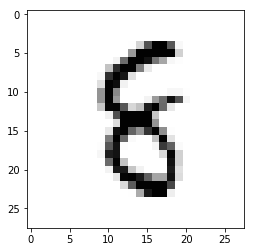

In [2]:
with tf.name_scope("cost") as scope:
    cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

with tf.name_scope("train") as scope:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer],
                            feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1),
              'cost =', '{:.9f}'.format(avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()